In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
path = "../../Risultati/Chlorine/outlier_detection_classification.csv"
df = pd.read_csv(path)
df.head()
df.reset_index(drop=True)
df['percentage'] = 100 - df['percentage']
df

,percentage,outlier,imputation,r2
0,100,none,none,0.793202
1,100,none,none,0.782348
2,100,none,none,0.791774
3,100,none,none,0.784633
4,100,none,none,0.789203
...,...,...,...,...
200,50,none,none,0.769494
201,50,z,none,0.521565
202,50,lof,none,0.591831
203,50,iforest,none,0.685804


In [21]:
df_grouped = df.groupby(['outlier','imputation']).mean().sort_values(by='r2', ascending=False)
print(df_grouped)

                    percentage        r2
outlier imputation                      
none    none         73.333333  0.781072
hst     none         70.000000  0.687803
iforest none         70.000000  0.650693
lof     none         70.000000  0.646037
z       none         70.000000  0.518166


In [22]:
df_none = df[(df['outlier'] == 'none')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_none

,percentage,r2
0,50,0.774243
1,60,0.777064
2,70,0.780634
3,80,0.782598
4,90,0.786347
5,100,0.788232


In [23]:
df_z = df[(df['outlier'] == 'z')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_z

,percentage,r2
0,50,0.516781
1,60,0.518102
2,70,0.517674
3,80,0.518102
4,90,0.520173


In [24]:
df_lof = df[(df['outlier'] == 'lof')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_lof

,percentage,r2
0,50,0.596044
1,60,0.584512
2,70,0.652849
3,80,0.682341
4,90,0.714439


In [25]:
df_if = df[(df['outlier'] == 'iforest')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_if

,percentage,r2
0,50,0.668773
1,60,0.642102
2,70,0.653242
3,80,0.643709
4,90,0.645637


In [26]:
df_hst = df[(df['outlier'] == 'hst')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_hst

,percentage,r2
0,50,0.712546
1,60,0.713296
2,70,0.697158
3,80,0.680091
4,90,0.635925


[]

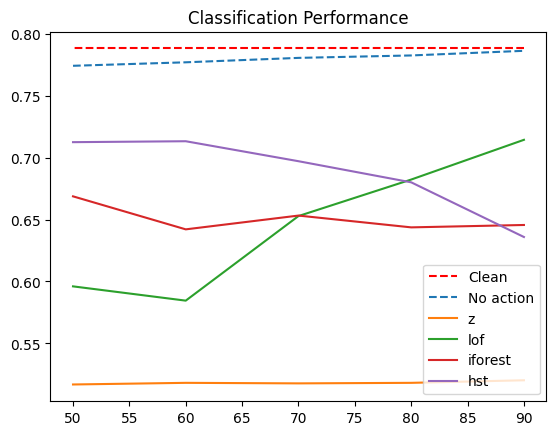

In [27]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['r2'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['r2'].iloc[:-1], '--', label='No action')
plt.plot(df_z['percentage'],df_z['r2'], label='z')
plt.plot(df_lof['percentage'],df_lof['r2'], label='lof')
plt.plot(df_if['percentage'],df_if['r2'], label='iforest')
plt.plot(df_hst['percentage'],df_hst['r2'], label='hst')
plt.title("Classification Performance")
plt.legend()
plt.plot()